# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time
import pickle
import os

import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier

# Load and Select Columns

In [2]:
df = pd.read_csv("EEG_Features_Only_S1-6_Final.csv")

LE = LabelEncoder()
df['Activity_Label_OpenBCI'] = LE.fit_transform(df['Activity_Label_OpenBCI'])

# Display DataFrame

In [3]:
df

,Ch1_Std,Ch1_RMS,Ch1_Delta,Ch1_Theta,Ch1_Alpha,Ch1_Beta,Ch1_Gamma,Ch2_Std,Ch2_RMS,Ch2_Delta,...,Ch15_Beta,Ch15_Gamma,Ch16_Std,Ch16_RMS,Ch16_Delta,Ch16_Theta,Ch16_Alpha,Ch16_Beta,Ch16_Gamma,Activity_Label_OpenBCI
0,8.481639e+01,8.469504e+01,8.097602e+03,4.609096e+02,9.916813e+00,4.021377e+00,8.163918e-01,2878.735366,2938.197366,5.076384e+06,...,7.441275e+03,3.336877e+03,83.324185,83.277666,7.678610e+03,4.550078e+02,1.008555e+01,3.925317e+00,7.836145e-01,4
1,4.273938e+01,4.497203e+01,5.644724e+02,3.485273e+01,3.951395e+00,2.233741e+00,4.020157e-01,2952.795167,2976.576335,8.050198e+06,...,5.700246e+05,3.185878e+05,177.061735,177.698427,7.988227e+03,1.278034e+02,5.046567e+00,3.411007e+00,7.810248e-01,4
2,4.355937e+03,4.347217e+03,2.337540e+05,1.810044e+05,2.203589e+05,6.814688e+05,5.506022e+05,4271.266200,4272.654724,4.594663e+06,...,1.454139e+06,2.188176e+06,8518.589952,8502.430045,4.688902e+06,2.678694e+06,2.368872e+06,3.894219e+06,2.370518e+06,4
3,4.357983e+03,4.349266e+03,1.986304e+06,2.770048e+06,3.375507e+06,1.043204e+07,7.565197e+06,3850.463522,3849.996108,3.224512e+06,...,1.030400e+07,2.063400e+07,8556.589140,8539.459107,1.818531e+07,2.353381e+07,2.298695e+07,3.390644e+07,1.710144e+07,4
4,1.408806e+02,1.406034e+02,8.412473e+03,1.778365e+02,4.354247e+00,1.306978e+02,2.582422e+02,1282.615947,1283.906145,2.216934e+05,...,1.859281e+06,3.859369e+06,984.533660,995.000798,1.723084e+05,3.704453e+03,1.481955e+02,2.106565e+05,4.396180e+05,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24616,4.633040e-08,4.663065e-08,1.920778e-15,3.021997e-17,2.448289e-19,4.279193e-19,1.570072e-19,34.174634,34.594073,9.934398e+02,...,3.778759e+01,3.420495e+00,110.198943,110.046888,1.162683e+04,3.896951e+03,2.288077e+02,8.014396e+01,7.398310e+00,1
24617,3.034054e-08,3.037697e-08,7.389073e-16,1.595385e-17,1.126162e-19,1.815206e-19,6.668552e-20,20.866602,21.080115,9.642427e+01,...,4.569948e+01,2.926848e+00,106.922397,106.765160,9.562197e+03,3.861285e+03,2.382150e+02,1.203743e+02,9.437123e+00,1
24618,3.328582e-08,3.336597e-08,8.555083e-16,1.956145e-17,7.893057e-20,1.389664e-19,5.079255e-20,188.304849,188.021559,1.176359e+04,...,8.834395e+01,5.656901e+00,209.990506,209.657990,3.643147e+04,1.241316e+04,2.079822e+03,1.345870e+03,1.750711e+02,1
24619,3.715874e-08,3.716838e-08,1.510927e-15,3.635408e-17,1.415154e-19,2.537753e-19,9.291162e-20,2541.187574,2542.280324,1.951544e+06,...,8.771306e+01,9.299659e+00,213.378354,212.951171,4.576922e+04,1.075159e+04,1.618459e+03,9.843563e+02,1.425723e+02,1


# Feature and Target Variable Setup

In [4]:
# The top 101 most important features
important_features_expanded = [
    'Ch11_Beta', 'Ch9_Beta', 'Ch10_Beta', 'Ch7_Beta', 'Ch16_Beta', 'Ch11_RMS',
    'Ch14_Beta', 'Ch13_Beta', 'Ch11_Std', 'Ch9_Std', 'Ch15_Std', 'Ch10_Std',
    'Ch7_RMS', 'Ch10_Theta', 'Ch15_Beta', 'Ch13_RMS', 'Ch10_Delta', 'Ch11_Delta',
    'Ch16_RMS', 'Ch7_Delta', 'Ch15_RMS', 'Ch10_RMS', 'Ch10_Alpha', 'Ch11_Gamma',
    'Ch9_RMS', 'Ch13_Std', 'Ch11_Alpha', 'Ch14_RMS', 'Ch11_Theta', 'Ch7_Theta',
    'Ch12_Beta', 'Ch6_RMS', 'Ch14_Delta', 'Ch7_Std', 'Ch5_Std', 'Ch6_Std',
    'Ch3_Beta', 'Ch16_Std', 'Ch3_RMS', 'Ch2_Beta', 'Ch8_Std', 'Ch13_Theta',
    'Ch5_RMS', 'Ch13_Gamma', 'Ch15_Delta', 'Ch13_Alpha', 'Ch8_Beta', 'Ch14_Std',
    'Ch7_Alpha', 'Ch6_Beta', 'Ch4_Std', 'Ch10_Gamma', 'Ch8_RMS', 'Ch3_Std',
    'Ch4_RMS', 'Ch13_Delta', 'Ch9_Delta', 'Ch9_Theta', 'Ch5_Delta', 'Ch16_Alpha',
    'Ch6_Delta', 'Ch14_Theta', 'Ch12_Std', 'Ch4_Alpha', 'Ch16_Theta', 'Ch16_Gamma',
    'Ch9_Alpha', 'Ch7_Gamma', 'Ch9_Gamma', 'Ch15_Alpha', 'Ch8_Alpha', 'Ch5_Beta',
    'Ch2_Alpha', 'Ch6_Gamma', 'Ch2_RMS', 'Ch14_Alpha', 'Ch12_Alpha', 'Ch4_Beta',
    'Ch15_Theta', 'Ch12_RMS', 'Ch4_Gamma', 'Ch12_Delta', 'Ch16_Delta', 'Ch12_Gamma',
    'Ch3_Gamma', 'Ch8_Delta', 'Ch6_Alpha', 'Ch3_Delta', 'Ch5_Gamma', 'Ch5_Theta',
    'Ch5_Alpha', 'Ch12_Theta', 'Ch2_Std', 'Ch15_Gamma', 'Ch2_Gamma', 'Ch8_Theta',
    'Ch4_Delta', 'Ch14_Gamma', 'Ch3_Alpha', 'Ch8_Gamma', 'Ch6_Theta'
]

X = df[important_features_expanded].values
y = df['Activity_Label_OpenBCI'].values

# Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=15, stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (17234, 101)
X_test shape: (7387, 101)


# XGBoost Model Training, Evaluation, and Cross-Validation

===== Training and Inference Times =====
Training Time: 7.5354 seconds
Inference Time (for test set): 0.0398 seconds

===== Stratified Cross-Validation Results =====
Stratified CV Accuracy (mean ± std): 0.9673 ± 0.0025
Training Set Accuracy: 1.0000
Test Set Accuracy: 0.9652

===== Classification Report =====
                             precision    recall  f1-score   support

               Chair Squats       0.95      0.98      0.97       686
   Light Stationary Cycling       0.97      0.96      0.97       567
          Marching in Place       0.98      0.98      0.98       763
        Seated Boxing Hooks       0.97      0.97      0.97       742
      Seated Leg Extensions       0.97      0.98      0.98       776
Seated Medicine Ball Twists       0.95      0.96      0.95       763
          Seated Side Bends       0.96      0.96      0.96       806
              Side-Stepping       0.97      0.96      0.97       600
  Standing Heel-to-Toe Walk       0.95      0.94      0.95       821

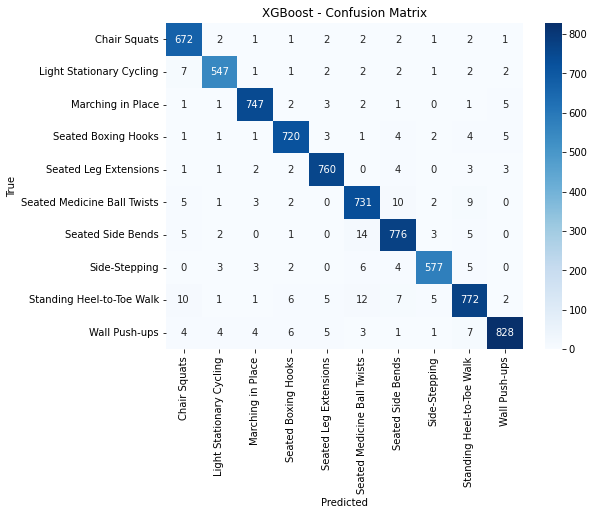

In [6]:
# Initialize the XGBClassifier with the best hyperparameters found
XGB = XGBClassifier(
    n_estimators=200,
    learning_rate=0.09661761457749352,  
    max_depth=7,  
    subsample=0.9124217733388136,  
    colsample_bytree=0.7467983561008608,  
    gamma=0.017425083650459836,  
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# ============================ Model Training and Time Measurement ============================

# Measure the time to train the model
start_train_time = time.time()
XGB.fit(X_train, y_train)
train_time = time.time() - start_train_time

print("===== Training and Inference Times =====")
print(f"Training Time: {train_time:.4f} seconds")

# ============================ Inference and Time Measurement ============================

start_infer_time = time.time()
XGB.predict(X_test)
infer_time = time.time() - start_infer_time

print(f"Inference Time (for test set): {infer_time:.4f} seconds")

# ============================ Accuracy Calculation ============================

train_preds = XGB.predict(X_train)
test_preds = XGB.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

# ============================ Stratified K-Fold Cross-Validation ============================

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(XGB, X, y, cv=skf, scoring='accuracy')

mean_cv_score = cross_val_scores.mean()
std_cv_score = cross_val_scores.std()

# =========================== Combined Results ===========================

print("\n===== Stratified Cross-Validation Results =====")
print(f"Stratified CV Accuracy (mean ± std): {mean_cv_score:.4f} ± {std_cv_score:.4f}")
print(f"Training Set Accuracy: {train_acc:.4f}")
print(f"Test Set Accuracy: {test_acc:.4f}")

# ============================ Classification Report ============================

class_names = LE.classes_

print("\n===== Classification Report =====")
print(classification_report(y_test, test_preds, target_names=class_names))

# ============================ Confusion Matrix ============================

conf_matrix = confusion_matrix(y_test, test_preds)
df_conf_matrix = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

print("\n===== Confusion Matrix on Test Set =====")
print(df_conf_matrix)

# ======================= Plot Confusion Matrix ========================

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save Trained XGBoost Model

In [7]:
import pickle

with open("XGB_S1_6_EEG_expanded.pkl", "wb") as file:
    pickle.dump(XGB, file)

print("XGBoost model for S1-6 EEG data has been successfully saved to 'XGB_S1_6_EEG_expanded.pkl'")

XGBoost model for S1-6 EEG data has been successfully saved to 'XGB_S1_6_EEG_expanded.pkl'
